In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import os

In [2]:
# set pandas visualization options

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# read train and test

base_path=os.path.abspath(os.getcwd())

df=pd.read_csv(base_path+"\\data-scientist-technical-test-main\\data\\auto-insurance-fall-2017\\train_auto.csv", sep=",", header=0)
df_test=pd.read_csv(base_path+"\\data-scientist-technical-test-main\\data\\auto-insurance-fall-2017\\test_auto.csv", sep=",", header=0)

In [4]:
# define drop and target cols

drop_cols=["INDEX", "TARGET_AMT"]
target_col=["TARGET_FLAG"]

df=df.drop(columns=drop_cols, axis=1)
df_test=df_test.drop(columns=drop_cols, axis=1)

### label encoding

In [5]:
def binary_label_encoded(df, col_list):
    one_values  = ["yes", "True", "Yes", "M", "Commercial", "Highly Urban/ Urban"]
    zero_values = ["no", "False", "No", "z_No", "z_F", "Private", "z_Highly Rural/ Rural"]
    for col in col_list:
        replace_dict={}
        unq_val=df[col].unique()
        for el in unq_val:
            if el in one_values:
                replace_dict[el] = 1
            elif el in zero_values:
                replace_dict[el] = 0

        df=df.replace({col: replace_dict})
        
    return df

list_binary_LE=["PARENT1",
                "MSTATUS",
                "SEX",
                "CAR_USE",
                "RED_CAR",
                "REVOKED",
                "URBANICITY"]

df=binary_label_encoded(df, list_binary_LE)
df_test=binary_label_encoded(df_test, list_binary_LE)

### ordinal encoding

In [6]:
# ordinal encoded col

education_dict = {"<High School" : 0,
                  "z_High School" : 1,
                  "Bachelors" : 2,
                  "Masters" : 3,
                  "PhD" : 4}

df=df.replace({"EDUCATION": education_dict})
df_test=df_test.replace({"EDUCATION": education_dict})

### remove dollars and cast to float

In [7]:
def dollars_to_float(df, col_list):
    for col in col_list:
        df[col]=df[col].str.replace("$","")\
                       .str.replace(",", ".")\
                       .astype("float32")

dollars_list = ["INCOME", "HOME_VAL", "BLUEBOOK", "OLDCLAIM"]        
dollars_to_float(df, dollars_list)
dollars_to_float(df_test, dollars_list)

C:\Users\11622563\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


# correlation matrix

### train

In [8]:
def display_correlation_matrix(df):# Compute the correlation matrix
    corr=df.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    plt.figure(figsize=(30,30))
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    plt.show()

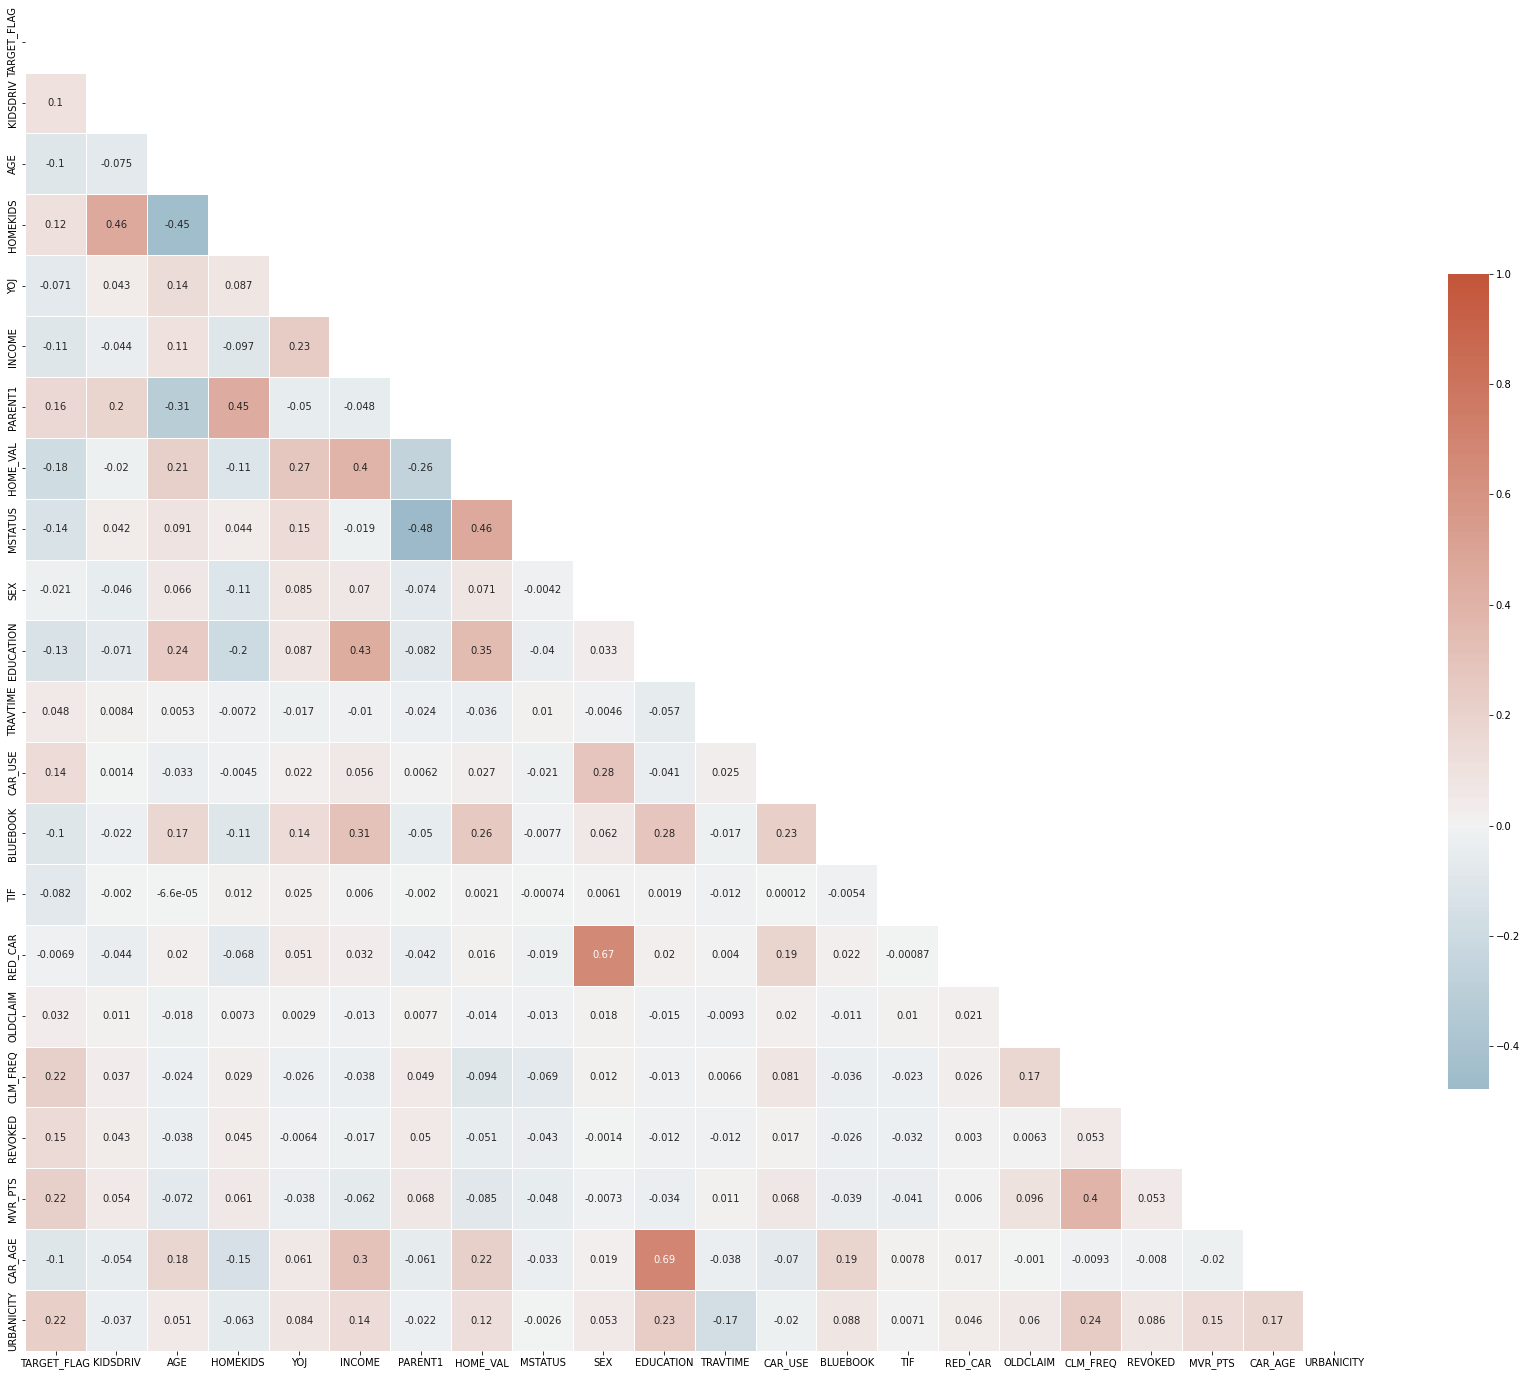

In [9]:
display_correlation_matrix(df)

In [10]:
# drop correlated columns

df.drop(columns=["EDUCATION","RED_CAR"], axis=1, inplace=True)
df_test.drop(columns=["EDUCATION","RED_CAR"], axis=1, inplace=True)

# FILL

In [11]:
def check_nulls(df):
    fill_list=[]
    print("Columns with nulls:")
    for col in df.columns:
        num_nulls = df[col].isna().sum()
        if num_nulls > 0:
            print(col, num_nulls)
            fill_list.append(col)
        
print(check_nulls(df))
print(check_nulls(df_test))

Columns with nulls:
AGE 6
YOJ 454
INCOME 445
HOME_VAL 464
JOB 526
CAR_AGE 510
None
Columns with nulls:
TARGET_FLAG 2141
AGE 1
YOJ 94
INCOME 125
HOME_VAL 111
JOB 139
CAR_AGE 129
None


### fill with mode

In [12]:
mode_cols=["AGE", "YOJ", "JOB", "INCOME", "HOME_VAL", "CAR_AGE"]

for col in mode_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
    df_test[col].fillna(df_test[col].mode()[0], inplace=True)

### ohe

In [13]:
ohe_list = ["JOB", "CAR_TYPE"]


def return_ohe_feature(df, ohe_cols):
    ohe=OneHotEncoder(sparse=False)
    ohe=ohe.fit(df[ohe_cols])
    column_name = ohe.get_feature_names(ohe_cols)
    train_X_encoded = ohe.transform(df[ohe_cols])
    one_hot_encoded_frame =  pd.DataFrame(train_X_encoded, columns=column_name)
    df=pd.concat([df,one_hot_encoded_frame], axis=1)\
         .drop(columns=ohe_cols, axis=1)
    return df
    
df=return_ohe_feature(df, ohe_list)
df_test=return_ohe_feature(df_test, ohe_list)

C:\Users\11622563\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\11622563\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### write preprocessed dataframes

In [14]:
df.to_csv(base_path+"\\data-scientist-technical-test-main\\data\\auto-insurance-fall-2017\\train_auto_preproc.csv", sep=",")

In [15]:
df_test.to_csv(base_path+"\\data-scientist-technical-test-main\\data\\auto-insurance-fall-2017\\test_auto_preproc.csv", sep=",")